# Exploring Pandas with NYC Flights Dataset

R users will recognize this famous dataset as a favorite of Hadley Wickham, author of dplyr.  No matter, we can use it with pandas as
well.

This dataset will give us flight delay data from all flights departing from the three NYC airports (JFK, LGA, EWR) in the year 2013.



In [12]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
df = pd.read_csv('../data/nycflights13/flights.csv.gz')

In [3]:
df

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,2013-01-01 05:00:00
6,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,507,N516JB,EWR,FLL,158.0,1065,6,0,2013-01-01 06:00:00
7,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,5708,N829AS,LGA,IAD,53.0,229,6,0,2013-01-01 06:00:00
8,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,79,N593JB,JFK,MCO,140.0,944,6,0,2013-01-01 06:00:00
9,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,301,N3ALAA,LGA,ORD,138.0,733,6,0,2013-01-01 06:00:00


Let us focus on some summary and visualizations that we can do here. Let's start out by finding the average delay by month.  We'll also do a matlibplot on it.

In [19]:
mean_delay_by_month = df.groupby(['month'])['arr_delay'].mean()
mean_delay_by_month

month
1      6.129972
2      5.613019
3      5.807577
4     11.176063
5      3.521509
6     16.481330
7     16.711307
8      6.040652
9     -4.018364
10    -0.167063
11     0.461347
12    14.870355
Name: arr_delay, dtype: float64

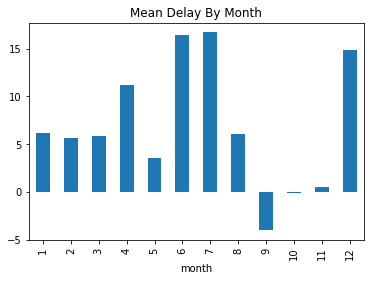

In [6]:
mean_month_plt = mean_delay_by_month.plot(kind='bar', title="Mean Delay By Month")
mean_month_plt

Notice that flights in two months actually have negative delay.  No doubt airlines "pad" flight times to achieve better results.

One would guess that flights to certain airports may have different results. For example, flights to Chicago (ORD) would no doubt be affected by winter weather. Let's take a look at that.

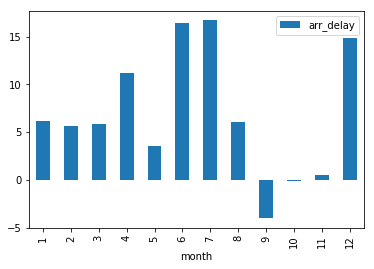

In [7]:
df[['arr_delay', 'month']].groupby('month').mean().plot(kind='bar')


In [47]:
mean_delay_by_month_ord = df[(df.dest == 'ORD') | (df.carrier == 'UA')].groupby(['month', 'carrier'])['arr_delay'].mean()
#md = mean_delay_by_month_ord[(mean_delay_by_month_ord.carrier == 'UA')]#.groupby(['month'])['arr_delay'].mean()
print(md)
print(mean_delay_by_month_ord)


month
1      7.102450
2      2.415704
3     -1.702000
4     19.803279
5      7.772575
6     13.500000
7      5.419238
8      7.263158
9     -4.698366
10    -0.625514
11     2.428571
12    20.029412
Name: arr_delay, dtype: float64
month  carrier
1      9E          10.850575
       AA           2.145882
       B6          13.213115
       MQ          14.627451
       OO         107.000000
       UA           3.175599
2      9E          11.723684
       AA           1.402667
       B6          19.796296
       MQ           3.216374
       UA           0.194611
3      9E          14.726190
       AA          -8.167816
       B6           5.854839
       MQ          -3.253521
       UA           1.553066
4      9E          14.162500
       AA          12.960080
       B6          17.947368
       EV          17.500000
       MQ          35.693467
       UA           8.707513
5      9E          17.250000
       AA          -0.274953
       B6          11.739130
       MQ          23.317757
 

Flights to Chicago (ORD)
month  carrier
1      9E          10.850575
       AA           2.145882
       B6          13.213115
       MQ          14.627451
       OO         107.000000
       UA           7.102450
2      9E          11.723684
       AA           1.402667
       B6          19.796296
       MQ           3.216374
       UA           2.415704
3      9E          14.726190
       AA          -8.167816
       B6           5.854839
       MQ          -3.253521
       UA          -1.702000
4      9E          14.162500
       AA          12.960080
       B6          17.947368
       EV          17.500000
       MQ          35.693467
       UA          19.803279
5      9E          17.250000
       AA          -0.274953
       B6          11.739130
       MQ          23.317757
       UA           7.772575
6      9E          29.078947
       AA           2.618774
       B6          30.436782
                     ...    
7      9E          25.931818
       AA          -0.817851
   

AttributeError: 'str' object has no attribute 'autoscale_None'

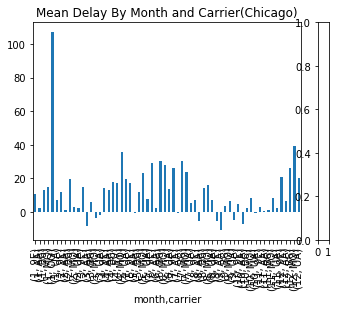

In [51]:
mean_delay_by_month_ord = df[(df.dest == 'ORD')].groupby(['month', 'carrier'])['arr_delay'].mean()
print("Flights to Chicago (ORD)")
print(mean_delay_by_month_ord)

mean_month_plt_ord = mean_delay_by_month_ord.plot(kind='bar', title="Mean Delay By Month and Carrier(Chicago)")
plt.colorbar('carrier')
mean_month_plt_ord


Flights to Los Angeles (LAX)
month
1     -4.160312
2     -7.601824
3     -5.280928
4      3.085153
5     -7.150657
6     13.007027
7      8.191432
8      1.028667
9     -8.719044
10    -1.205694
11    -0.103290
12    10.724460
Name: arr_delay, dtype: float64


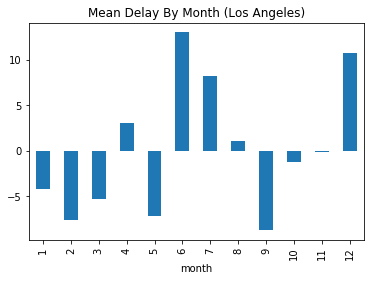

In [36]:
# Let's try Los Angeles and compare that

mean_delay_by_month_lax = df[(df.dest == 'LAX')].groupby(['month'])['arr_delay'].mean()
print("Flights to Los Angeles (LAX)")
print(mean_delay_by_month_lax)

mean_month_plt_lax = mean_delay_by_month_lax.plot(kind='bar', title="Mean Delay By Month (Los Angeles)")
mean_month_plt_lax

Perhaps we would like to see which Airline carrier is the best for delays.  Here we have some plots to do that.


Text(0.5, 1.0, 'Average Departure Delay by Carrier in 2008, All  airports')

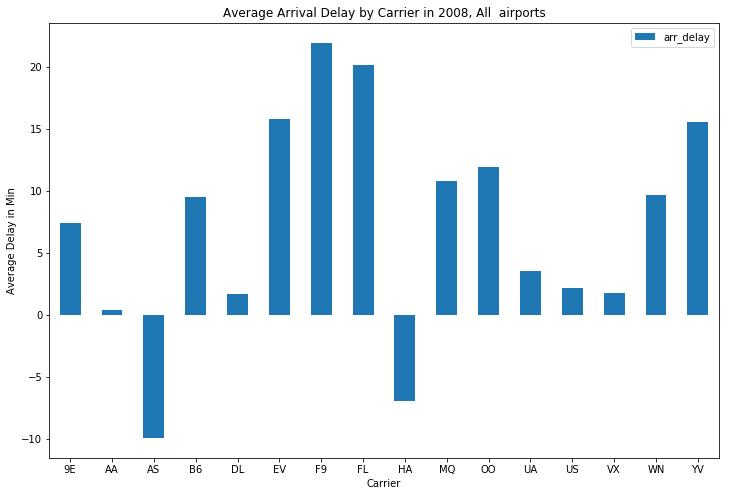

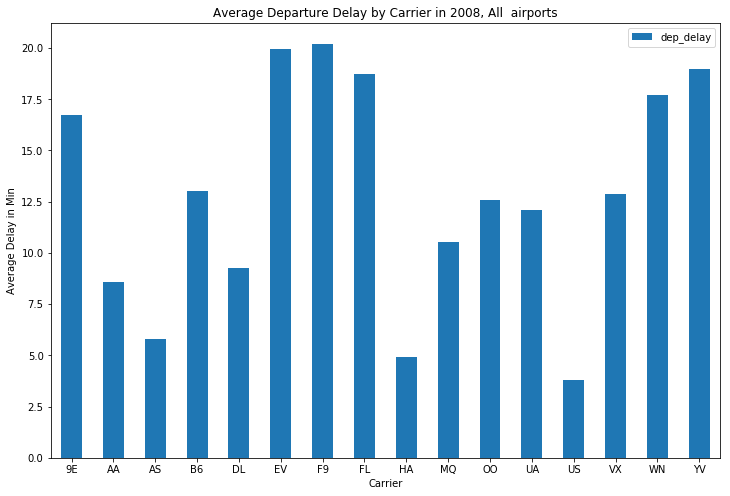

In [11]:
# Examine if specific carrier will create different delay impact
df[['carrier','arr_delay']].groupby('carrier').mean().plot(kind='bar', figsize =(12,8))
plt.xticks(rotation=0)
plt.xlabel('Carrier')
plt.ylabel('Average Delay in Min')
plt.title('Average Arrival Delay by Carrier in 2008, All  airports')


df[['carrier','dep_delay']].groupby('carrier').mean().plot(kind='bar', figsize =(12,8))
plt.xticks(rotation=0)
plt.xlabel('Carrier')
plt.ylabel('Average Delay in Min')
plt.title('Average Departure Delay by Carrier in 2008, All  airports')


We see that F9 (Frontier Airlines) is among the worst in terms of delays, while Hawaiian (HA) is among the best.

### Joins

We have a couple of other tables in our dataset: Weather, and airports. Let's look at these two tables and see if we can perform joins.

In [39]:
weather = pd.read_csv('../data/nycflights13/weather.csv.gz')
print(weather.head())
print(df.head())

  origin  year  month  day  hour   temp   dewp  humid  wind_dir  wind_speed  \
0    EWR  2013      1    1     0  37.04  21.92  53.97     230.0    10.35702   
1    EWR  2013      1    1     1  37.04  21.92  53.97     230.0    13.80936   
2    EWR  2013      1    1     2  37.94  21.92  52.09     230.0    12.65858   
3    EWR  2013      1    1     3  37.94  23.00  54.51     230.0    13.80936   
4    EWR  2013      1    1     4  37.94  24.08  57.04     240.0    14.96014   

   wind_gust  precip  pressure  visib            time_hour  
0  11.918651     0.0    1013.9   10.0  2012-12-31 19:00:00  
1  15.891535     0.0    1013.0   10.0  2012-12-31 20:00:00  
2  14.567241     0.0    1012.6   10.0  2012-12-31 21:00:00  
3  15.891535     0.0    1012.7   10.0  2012-12-31 22:00:00  
4  17.215830     0.0    1012.8   10.0  2012-12-31 23:00:00  
   year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0  2013      1    1     517.0             515        2.0     830.0   
1  2013      1    1

In [49]:
df_withweather = pd.merge(df, weather[['year','month', 'day', 'hour', 'origin', 'temp']], how='left', on=['year','month', 'day', 'hour', 'origin'])
df_withweather.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,temp
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,NaN
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,NaN
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,NaN
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,NaN
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,39.92


In [ ]:
airports = pd.read_csv('../data/nycflights13/airports.csv.gz')
airports

In [ ]:
df_withairport = pd.merge(df_withweather, airports, how='left', left_on='dest', right_on='faa')
df_withairport